In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
sns.set_context('notebook')
import os
DATA_FOLDER = '/Users/KhalilCherif/Desktop/ada/ADA2017-Tutorials/02 - Intro to Pandas/Data'
os.chdir(DATA_FOLDER)

In [109]:
import random

In [199]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

In [4]:
data = pd.read_excel(DATA_FOLDER+'/titanic.xls')

In [5]:
df1 = pd.DataFrame({'attribute': list(data),'type':list(data.dtypes)})

In [6]:
data.select_dtypes(exclude=[object]).min().index

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body'], dtype='object')

In [7]:
df1

attribute     type
0      pclass    int64
1    survived    int64
2        name   object
3         sex   object
4         age  float64
5       sibsp    int64
6       parch    int64
7      ticket   object
8        fare  float64
9       cabin   object
10   embarked   object
11       boat   object
12       body  float64
13  home.dest   object

In [8]:
df1.set_index('attribute', inplace=True)

In [9]:
np.array(data.select_dtypes(exclude=[object]).min().index)

array(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body'], dtype=object)

In [10]:
df1.loc[data.select_dtypes(exclude=[object]).min().index,'Min']=data.select_dtypes(exclude=[object]).min()

In [11]:
df1.loc[data.select_dtypes(exclude=[object]).max().index,'Max']=data.select_dtypes(exclude=[object]).max()

In [ ]:
ind = [elem for elem in data.columns if data[elem].nunique()<9]
for elem in ind:
    data[elem]=data[elem].astype('category')
    

In [ ]:
data['pclass'].hist(bins=5)

In [ ]:
plt.hist(data['pclass'], bins=5)

In [ ]:
data.info()

In [ ]:
sns.countplot(data=data, x='embarked')

In [ ]:
sns.countplot(data=data, hue='survived', x='pclass')

In [ ]:
sns.countplot(data=data, x='sex')

In [ ]:
data['age'].hist(bins=10)

In [30]:
classes = data['pclass'].unique()
proportion_survived_by_class = [data.loc[data['pclass']==cls,'survived'].astype('int').mean() for cls in classes]

([<matplotlib.patches.Wedge at 0x1198c2470>,
  <matplotlib.text.Text at 0x1198cf4e0>])

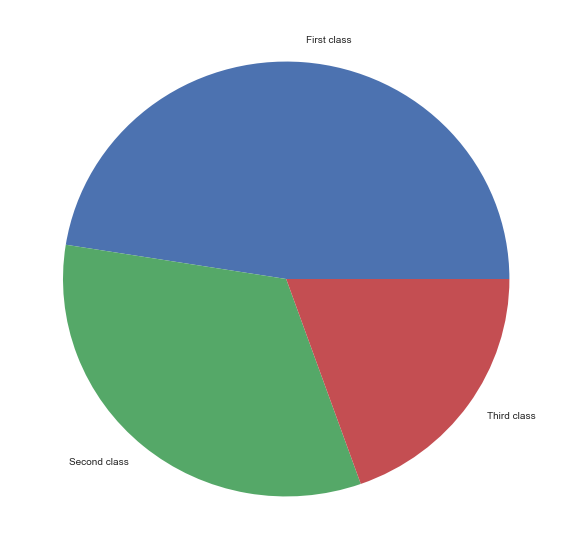

In [31]:
fig = plt.figure(figsize=(10,10))
plt.pie(proportion_survived_by_class, labels='First class-Second class-Third class'.split('-'))

In [32]:
df_class = pd.DataFrame({'pclass':data['pclass'].unique(), 'key': np.zeros(data['pclass'].nunique())})
df_sex = pd.DataFrame({'key': np.zeros(data['sex'].nunique()), 'sex': data['sex'].unique()})

In [33]:
df_class_sex = pd.merge(df_class, df_sex, on = 'key')[['pclass', 'sex']]

In [34]:
df_class_sex

pclass     sex
0       1  female
1       1    male
2       2  female
3       2    male
4       3  female
5       3    male

In [35]:
df_mean_class_sex = pd.DataFrame([('{}/{}'.format(df_class_sex.iloc[i,1],df_class_sex.iloc[i,0].astype('str')),data.loc[(data['pclass']==df_class_sex.iloc[i,0]) & (data['sex']==df_class_sex.iloc[i,1]),'survived'].astype('int').mean(),data.loc[(data['pclass']==df_class_sex.iloc[i,0]) & (data['sex']==df_class_sex.iloc[i,1]),'survived'].astype('int').sum()) for i in range(df_class_sex.shape[0])], columns='sex/class,survival rate,number of survivors'.split(','))






In [36]:
df_mean_class_sex.set_index('sex/class', inplace=True)

In [37]:
df_mean_class_sex

survival rate  number of survivors
sex/class                                    
female/1        0.965278                  139
male/1          0.340782                   61
female/2        0.886792                   94
male/2          0.146199                   25
female/3        0.490741                  106
male/3          0.152130                   75

<Container object of 6 artists>

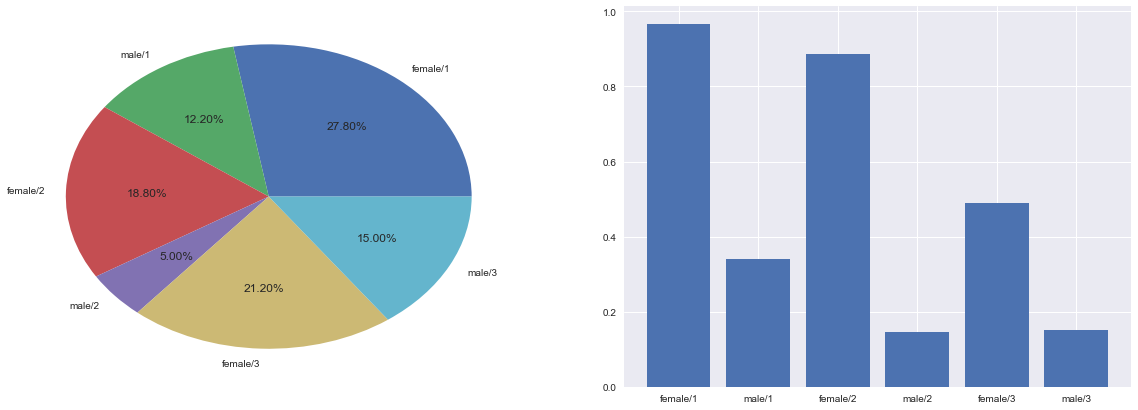

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
axes[0].pie(df_mean_class_sex['number of survivors'], labels = df_mean_class_sex.index, autopct='%1.2f%%')
axes[1].bar(height=df_mean_class_sex['survival rate'], left=range(len(df_mean_class_sex['survival rate'])), tick_label = df_mean_class_sex.index)

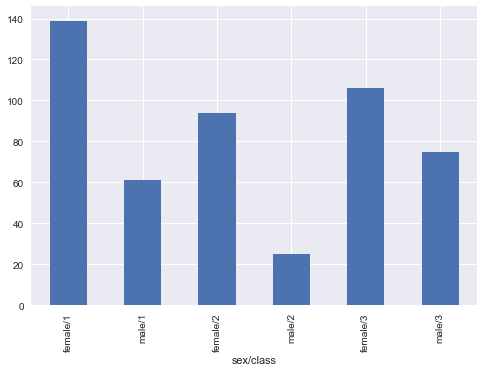

In [39]:
df_mean_class_sex['number of survivors'].plot(kind='bar')

<Container object of 98 artists>

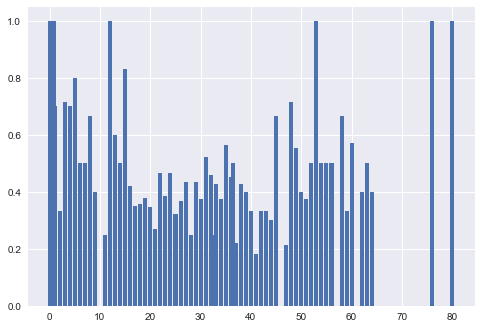

In [77]:
plt.bar(height = data['survived age'.split()].groupby(by='age')['survived'].mean(), left=data['survived age'.split()].groupby(by='age').mean().index)

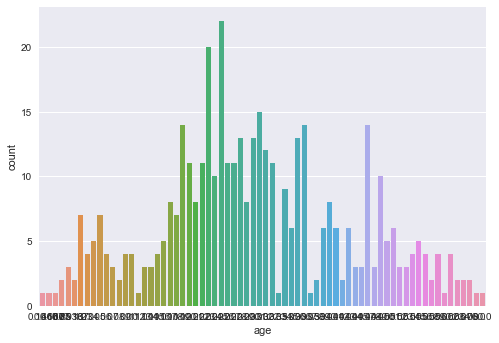

In [78]:
sns.countplot(data = data.loc[data['survived']==1, :], x='age')

In [79]:
data['survived age'.split()].groupby(by='age')['survived'].mean()

age
0.1667     1.000000
0.3333     0.000000
0.4167     1.000000
0.6667     1.000000
0.7500     0.666667
0.8333     1.000000
0.9167     1.000000
1.0000     0.700000
2.0000     0.333333
3.0000     0.714286
4.0000     0.700000
5.0000     0.800000
6.0000     0.500000
7.0000     0.500000
8.0000     0.666667
9.0000     0.400000
10.0000    0.000000
11.0000    0.250000
11.5000    0.000000
12.0000    1.000000
13.0000    0.600000
14.0000    0.500000
14.5000    0.000000
15.0000    0.833333
16.0000    0.421053
17.0000    0.350000
18.0000    0.358974
18.5000    0.000000
19.0000    0.379310
20.0000    0.347826
             ...   
46.0000    0.000000
47.0000    0.214286
48.0000    0.714286
49.0000    0.555556
50.0000    0.400000
51.0000    0.375000
52.0000    0.500000
53.0000    1.000000
54.0000    0.500000
55.0000    0.500000
55.5000    0.000000
56.0000    0.500000
57.0000    0.000000
58.0000    0.666667
59.0000    0.333333
60.0000    0.571429
60.5000    0.000000
61.0000    0.000000
62.0000    0.400

In [69]:
# The age category represents '1' for young persons (under 18) and 'old' persons (more than 55) and '0' otherwise

In [153]:
#data['age category'] = data['age'].apply(lambda x: 0 if 21<x<39 else 1).astype('category')

cat = np.append(np.zeros(int(data.shape[0]/2)),np.ones(data.shape[0]-int(data.shape[0]/2)))
np.random.shuffle(cat)

data['age category'] = pd.Series(cat).astype('int').astype('category')


In [154]:
df_class_sex['key']=np.zeros(len(df_class_sex.index))

In [155]:
df_class_sex_age_cat = pd.merge(left=df_class_sex, right=pd.DataFrame({'age category':data['age category'].unique(), 'key':np.zeros(data['age category'].nunique())}), on='key')['sex,pclass,age category'.split(',')]

In [156]:
df_class_sex_age_cat

sex  pclass  age category
0   female       1             1
1   female       1             0
2     male       1             1
3     male       1             0
4   female       2             1
5   female       2             0
6     male       2             1
7     male       2             0
8   female       3             1
9   female       3             0
10    male       3             1
11    male       3             0

In [157]:
avg_class_sex_age_cat = pd.DataFrame([('{}/{}/{}'.format(df_class_sex_age_cat.loc[i,'sex'], df_class_sex_age_cat.loc[i,'pclass'],df_class_sex_age_cat.loc[i,'age category']), data.loc[(data['sex']==df_class_sex_age_cat.loc[i,'sex'])&(data['pclass']==df_class_sex_age_cat.loc[i,'pclass'])&(data['age category']==df_class_sex_age_cat.loc[i,'age category']),'survived'].mean(),data.loc[(data['sex']==df_class_sex_age_cat.loc[i,'sex'])&(data['pclass']==df_class_sex_age_cat.loc[i,'pclass'])&(data['age category']==df_class_sex_age_cat.loc[i,'age category']),'survived'].astype('int').sum()) for i in range(df_class_sex_age_cat.shape[0])], columns='sex/class/age category,survival rate,number of survivors'.split(','))


avg_class_sex_age_cat.set_index(keys=['sex/class/age category'])



survival rate  number of survivors
sex/class/age category                                    
female/1/1                   0.984615                   64
female/1/0                   0.949367                   75
male/1/1                     0.372340                   35
male/1/0                     0.305882                   26
female/2/1                   0.862745                   44
female/2/0                   0.909091                   50
male/2/1                     0.162791                   14
male/2/0                     0.129412                   11
female/3/1                   0.471698                   50
female/3/0                   0.509091                   56
male/3/1                     0.169960                   43
male/3/0                     0.133333                   32

In [158]:
data['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [160]:
len(data[data['age category']==0]) == len(data[data['age category']==1])-1

True

In [164]:
len(data[data['age category']==0])

654

In [165]:
data['age category'].astype('int').mean()

0.5003819709702063

In [166]:
len(data[data['age category']==1])

655